In [1]:
%load_ext autoreload
%autoreload 2
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 337 µs (started: 2022-05-03 17:22:08 -06:00)


In [2]:
from NeuralODE import NeuralODE
from NeuralNetwork import NeuralNetwork, read_network_from_sherlock_file
import numpy as np

time: 267 ms (started: 2022-05-03 17:22:08 -06:00)


In [3]:
nn = read_network_from_sherlock_file('networks/controller_network_ball_and_beam.nt')

time: 2.38 ms (started: 2022-05-03 17:22:09 -06:00)


In [22]:
def ball_and_beam_ode(x, u, w):
    dx0 = x[1]
    dx1 = -9.8 * np.sin(x[2]) + x[0]*(x[3]**2) + 0.05*w[0]
    dx2 = x[3]
    dx3 = u[0] -10
    return [dx0, dx1, dx2, dx3]

time: 839 µs (started: 2022-05-03 17:24:53 -06:00)


In [23]:
node = NeuralODE(nn,ball_and_beam_ode,4,1,[(-1,1)])

time: 766 µs (started: 2022-05-03 17:24:53 -06:00)


In [24]:
tpoints, res = node.simulate(25.0, [0.1, 0.1, -0.2, 0.1], 0.01 )

time: 833 ms (started: 2022-05-03 17:24:54 -06:00)


In [25]:
from matplotlib import pyplot as plt

time: 470 µs (started: 2022-05-03 17:24:55 -06:00)


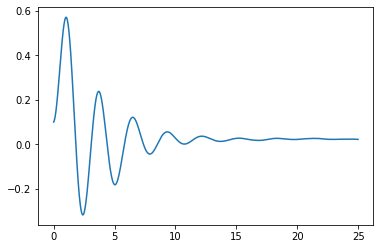

time: 103 ms (started: 2022-05-03 17:24:55 -06:00)


In [26]:
plt.plot(tpoints, [x for [x,_,_,_] in res[:-1]])

In [49]:
state_ranges = [(-1, 1), (-1,1), (-0.2, 0.2), (-0.1, 0.1)]

time: 655 µs (started: 2022-05-03 18:51:11 -06:00)


In [81]:
traces = node.simulate_for_random_initial_conditions(state_ranges,30.0, 0.02, 1000)

time: 8min 7s (started: 2022-05-03 20:20:53 -06:00)


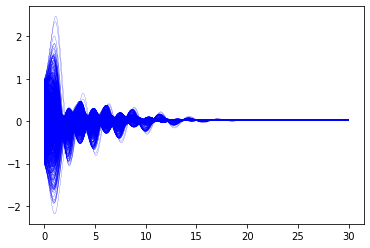

time: 1.77 s (started: 2022-05-03 20:29:01 -06:00)


In [82]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [x for [x,_,_,_] in tr[:-1]],'-b',lw=0.2)

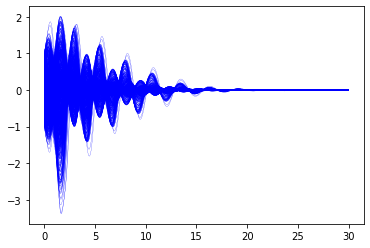

time: 1.72 s (started: 2022-05-03 20:29:03 -06:00)


In [83]:
for (tpoints,tr) in traces:
    plt.plot(tpoints, [y for [_,y,_,_] in tr[:-1]],'-b',lw=0.2)

In [84]:
stable_ranges= [(-0.05, 0.05), (-0.05, 0.05),(-0.05,0.05),(-0.05,0.05)]
stab_times= [node.get_stabilization_time(time_points, tr, stable_ranges) for (time_points, tr) in traces]
print(stab_times)

[1.86, 8.78, 7.82, 10.120000000000001, 12.700000000000001, 12.88, 9.74, 7.9, 5.8, 12.72, 11.3, 9.06, 2.58, 7.4, 9.22, 7.2, 5.84, 11.32, 10.26, 10.02, 15.22, 8.28, 8.14, 10.24, 7.5600000000000005, 10.3, 6.42, 7.16, 8.98, 8.76, 11.56, 12.8, 4.98, 9.8, 1.98, 8.66, 12.620000000000001, 7.76, 9.02, 7.140000000000001, 10.18, 8.98, 12.76, 9.3, 9.0, 12.76, 9.9, 10.36, 10.3, 12.74, 6.34, 8.58, 7.74, 10.32, 7.9, 7.96, 7.4, 6.62, 7.68, 4.82, 10.36, 12.74, 11.44, 8.14, 5.84, 5.5, 7.82, 11.540000000000001, 9.08, 5.1000000000000005, 8.2, 7.92, 6.2, 11.52, 5.4, 6.46, 8.76, 11.6, 6.640000000000001, 12.84, 9.66, 15.26, 6.0600000000000005, 11.620000000000001, 8.620000000000001, 10.28, 11.32, 13.96, 9.24, 8.26, 10.3, 5.62, 7.34, 10.18, 9.84, 10.16, 7.7, 6.44, 10.0, 10.4, 10.3, 10.040000000000001, 6.12, 15.14, 6.1000000000000005, 7.6000000000000005, 5.0600000000000005, 12.4, 12.84, 5.9, 11.700000000000001, 7.62, 4.12, 10.1, 11.6, 6.34, 10.0, 8.76, 6.66, 8.8, 12.8, 13.84, 9.120000000000001, 7.32, 5.52000000

(array([  6.,   4.,   4.,  15.,  17.,  40.,  44.,  68.,  60.,  97.,  66.,
        109.,  31., 118.,  27.,  92.,  37.,  50.,  51.,   8.,  25.,   0.,
         27.,   1.,   3.]),
 array([ 1.26  ,  1.9312,  2.6024,  3.2736,  3.9448,  4.616 ,  5.2872,
         5.9584,  6.6296,  7.3008,  7.972 ,  8.6432,  9.3144,  9.9856,
        10.6568, 11.328 , 11.9992, 12.6704, 13.3416, 14.0128, 14.684 ,
        15.3552, 16.0264, 16.6976, 17.3688, 18.04  ]),
 <BarContainer object of 25 artists>)

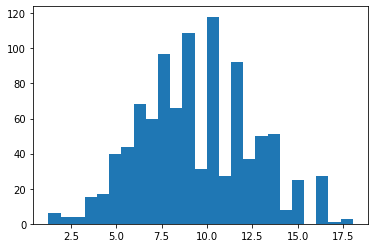

time: 151 ms (started: 2022-05-03 20:29:06 -06:00)


In [85]:
plt.hist(stab_times,bins=25)

In [87]:
timings = []
f = open('ball-and-beam-timings-10k.txt','r')
for line in f:
    timings.append(float(line))
f.close()

time: 7.29 ms (started: 2022-05-03 21:45:14 -06:00)


(array([  1.,   7.,  12.,  33.,  44.,  44.,  51.,  67.,  78., 101., 186.,
        237., 313., 329., 465., 519., 438., 721., 630., 444., 865., 340.,
        245., 954., 104., 198., 783.,  16., 117., 648.,  12.,  89., 396.,
          8.,  61., 184.,   0.,  27., 221.,   1.,   0.,  10.,   0.,   0.,
          1.]),
 array([ 0.12      ,  0.54755556,  0.97511111,  1.40266667,  1.83022222,
         2.25777778,  2.68533333,  3.11288889,  3.54044444,  3.968     ,
         4.39555556,  4.82311111,  5.25066667,  5.67822222,  6.10577778,
         6.53333333,  6.96088889,  7.38844444,  7.816     ,  8.24355556,
         8.67111111,  9.09866667,  9.52622222,  9.95377778, 10.38133333,
        10.80888889, 11.23644444, 11.664     , 12.09155556, 12.51911111,
        12.94666667, 13.37422222, 13.80177778, 14.22933333, 14.65688889,
        15.08444444, 15.512     , 15.93955556, 16.36711111, 16.79466667,
        17.22222222, 17.64977778, 18.07733333, 18.50488889, 18.93244444,
        19.36      ]),
 <BarCon

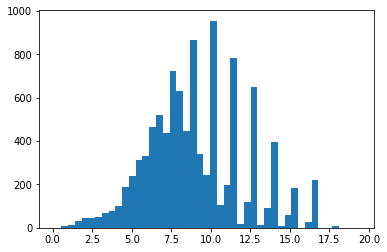

time: 210 ms (started: 2022-05-03 21:45:45 -06:00)


In [92]:
plt.hist(timings, bins=45)